In [1]:
import math  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import os  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import random  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import string  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import sys  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import time  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import traceback as tb  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
from collections import namedtuple  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import numpy as np  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import pandas as pd  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import pytest  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import util  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
from grading.grading import (  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    GradeResult,  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    IncorrectOutput,  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    grader,  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    run_with_timeout,  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    time_limit,  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
)  		  	

In [43]:
import math  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import sys  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
import numpy as np  
import LinRegLearner as lrl 
from DTLearner import DTLearner
from RTLearner import RTLearner	
from BagLearner import BagLearner
from InsaneLearner import InsaneLearner 
import matplotlib.pyplot as plt 
import time 
import sys 

In [97]:
test_x, test_y, train_x, train_y = None, None, None, None  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
permutation = None  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
author = None  		  
datafile = "Istanbul.csv"  		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
with util.get_learner_data_file(datafile) as f:  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    alldata = np.genfromtxt(f, delimiter=",")  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    # Skip the date column and header row if we're working on Istanbul data  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    if datafile == "Istanbul.csv":  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
        alldata = alldata[1:, 1:]  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    datasize = alldata.shape[0]  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    cutoff = int(datasize * 0.6)  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    permutation = np.random.permutation(alldata.shape[0])  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    col_permutation = np.random.permutation(alldata.shape[1] - 1)  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    train_data = alldata[permutation[:cutoff], :]  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    # train_x = train_data[:,:-1]  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    train_x = train_data[:, col_permutation]  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    train_y = train_data[:, -1]  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    test_data = alldata[permutation[cutoff:], :]  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    # test_x = test_data[:,:-1]  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    test_x = test_data[:, col_permutation]  		  	   		  	  			  		 			 	 	 		 		 	 		 		 	 		  	 	 			  	 
    test_y = test_data[:, -1]  	

In [114]:
def research_overfit(train_x, train_y, test_x, test_y, learner, plot_range=100): 
    in_sample_rmses = []
    out_sample_rmses = []

    for leaf_size in range(1, plot_range): 
        
        if learner is DTLearner or learner is RTLearner:
            learner_instance = learner(leaf_size)
        if learner is BagLearner:
            # learner_instance = learner(DTLearner,kwargs={"leaf_size": leaf_size}, bags=20, boost=False)
            learner_instance = learner(RTLearner,kwargs={"leaf_size": leaf_size}, bags=2, boost=False)
        
        learner_instance.add_evidence(train_x, train_y)

        in_sample_rmse = np.linalg.norm(learner_instance.query(train_x) - train_y) / np.sqrt(train_y.shape[0])
        out_sample_rmse = np.linalg.norm(learner_instance.query(test_x) - test_y) / np.sqrt(test_y.shape[0])

        in_sample_rmses.extend([in_sample_rmse])
        out_sample_rmses.extend([out_sample_rmse])

    return in_sample_rmses, out_sample_rmses

In [80]:
learner = BagLearner

In [115]:
in_s_rt, out_s_rt = research_overfit(train_x, train_y, test_x, test_y, learner)


In [118]:
in_s_dt, out_s_dt = research_overfit(train_x, train_y, test_x, test_y, learner_dt)

/Users/Ally.Zhang/Documents/VS Code/.venv/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/Ally.Zhang/Documents/VS Code/.venv/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [117]:
learner_dt = DTLearner

In [122]:
def gen_plot(in_sample_rmses, out_sample_rmses, title, data_x="in_sample", data_y="out_sample", x_label ="leaf size", y_label="rmse",  x_axis = range(1, 100)): 
    plt.clf()
    plt.plot(x_axis, in_sample_rmses, label = data_x)
    plt.plot(x_axis, out_sample_rmses, label = data_y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # plt.xticks(np.arange(5, 100, step=5))
    plt.grid()
    plt.legend()
    plt.savefig(f'images/{title}.png')		

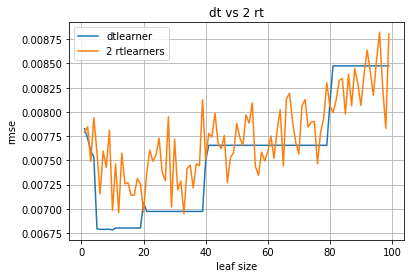

In [125]:
gen_plot(out_s_dt, out_s_rt, data_x = "dtlearner", data_y="2 rtlearners", title = "dt vs 2 rt")

In [34]:
np.argmin(out_s)

3

In [109]:
 train_x.shape[0]

321

In [110]:
def research_runtime(train_x, train_y): 

    runtime_dts_train = []
    runtime_rts_train = []
    runtime_dts_query = []
    runtime_rts_query = []

    for sample_size in range(10, train_x.shape[0], 10): 
        sample_x = train_x[:sample_size]
        sample_y = train_y[:sample_size]

        learner = DTLearner(leaf_size=1)
        start = time.time()
        learner.add_evidence(train_x, train_y)
        end = time.time()
        runtime_dts_train.extend([end-start])

        start = time.time()
        learner.query(test_x)
        end = time.time()

        learner = RTLearner(leaf_size=1)
        start = time.time()
        learner.add_evidence(train_x, train_y)
        end = time.time()
        runtime_rts_train.extend([end-start])

    return runtime_dts, runtime_rts

In [112]:
runtime_dt, runtime_rt = research_runtime(train_x, train_y)

In [103]:
def gen_plot(in_sample_rmses, out_sample_rmses, title, data_x="in_sample", data_y="out_sample", x_label ="leaf size", y_label="rmse",  x_axis = range(1, 100)): 
    plt.clf()
    plt.plot(x_axis, in_sample_rmses, label = data_x)
    plt.plot(x_axis, out_sample_rmses, label = data_y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid()
    plt.legend()
    plt.savefig(f'images/{title}.png')

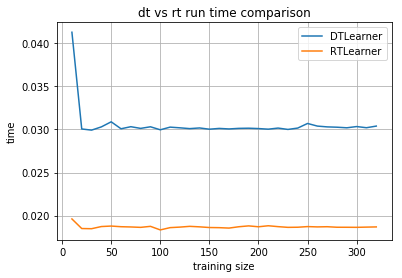

In [113]:
gen_plot(runtime_dt, runtime_rt, title= "dt vs rt run time comparison", data_x="DTLearner", data_y="RTLearner", x_label="training size", y_label="time", x_axis=range(10, train_x.shape[0], 10))	

In [126]:
 np.random.choice(range(10), 10, replace= True)

array([6, 9, 9, 2, 9, 9, 2, 4, 2, 1])

In [127]:
np.random.random(size=(100, 6))	

array([[0.29469642, 0.16577125, 0.88537268, 0.39245326, 0.7047727 ,
        0.70291353],
       [0.06462217, 0.8498849 , 0.81376325, 0.63069019, 0.51983638,
        0.94125387],
       [0.73754216, 0.7447532 , 0.31033038, 0.90244594, 0.32053915,
        0.48914962],
       [0.56389832, 0.2146111 , 0.78635818, 0.20976331, 0.9654384 ,
        0.15368571],
       [0.7168103 , 0.37030307, 0.13838971, 0.70609877, 0.23410564,
        0.86419713],
       [0.61595001, 0.25509448, 0.13424001, 0.24545181, 0.8545536 ,
        0.3072136 ],
       [0.95725144, 0.86744799, 0.05829273, 0.10238709, 0.3092251 ,
        0.97692624],
       [0.04773731, 0.85656784, 0.78856548, 0.21322453, 0.15222688,
        0.20959384],
       [0.93537858, 0.98863546, 0.91738196, 0.17882626, 0.34752796,
        0.93752621],
       [0.87505979, 0.85569058, 0.4098756 , 0.67921264, 0.0170296 ,
        0.42399777],
       [0.99238161, 0.7094943 , 0.38806168, 0.64393853, 0.43192632,
        0.57103155],
       [0.61498988, 0